# Perceptron
This notebook will first build a perceptron, one of the earliest neural network architectures, from scratch, then implement it with the [IBMEmployeeAttrition](https://github.com/Madison-Bunting/INDE-577/blob/main/IBMEmployeeAttrition.csv) dataset.

In [276]:
#Always include important imports at the top
import numpy as np #for linear algebra functions
import pandas as pd #for data processing the CSV
import random

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn imports
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [277]:
#importing the dataset as a dataframe
df = pd.read_csv("https://raw.githubusercontent.com/Madison-Bunting/INDE-577/main/IBMEmployeeAttrition.csv")

Preprocess the data by removing variables with zero variance (as uncovered in the [Exploring A New Dataset](https://github.com/Madison-Bunting/INDE-577/blob/main/Exploring%20a%20New%20Dataset.ipynb) Notebook.

In [278]:
#Drop variables with zero variance: EmployeeCount, Over18, and StandardHours
df.drop('EmployeeCount', axis = 1, inplace = True)
df.drop('Over18', axis = 1, inplace = True)
df.drop('StandardHours', axis = 1, inplace = True)

## Pre-Processing
Before we can create a perceptron with this dataset, we need to pre-process the data and encode labels. We will do this using sklearn's preprocessing package.

In [279]:
#Create a function which takes the dataset as input and ouputs the processed dataset
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['BusinessTravel'] = le.fit_transform(res_df['BusinessTravel'])
    res_df['Department'] = le.fit_transform(res_df['Department'])
    res_df['Education'] = le.fit_transform(res_df['Education'])
    res_df['EducationField'] = le.fit_transform(res_df['EducationField'])
    res_df['JobRole'] = le.fit_transform(res_df['JobRole'])
    res_df['Gender'] = le.fit_transform(res_df['Gender'])
    res_df['MaritalStatus'] = le.fit_transform(res_df['MaritalStatus'])
    res_df['OverTime'] = le.fit_transform(res_df['OverTime'])
    res_df['Attrition'] = le.fit_transform(res_df['Attrition'])
    return res_df

#Run the function on the desired dataset
encoded_df = preprocessor(df)

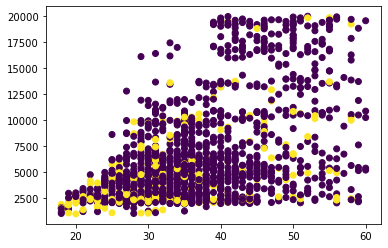

In [280]:
# Create X and Y Matrices
x_data = np.asarray(df[['Age','MonthlyIncome']])

#extract out labels
y_data = df['Attrition']
y_data = y_data.to_numpy()

for i, label in enumerate(y_data):
    if label == 'Yes':
        y_data[i] = 1
    elif label == 'No':
        y_data[i] = -1

plt.scatter(df.Age,df.MonthlyIncome, c= df.Attrition)

## Building the Perceptron

In [281]:
# Write sign function
def sign(weights, x):
    x_bar = np.array([1.0,x[0],x[1]])
    if weights.T @ x_bar > 0:
        return 1
    else:
        return -1

# Write Perceptron Update Rule(PUR) function
def PUR(weights, x, y):
    if sign(weights,x) != y:
        weights = weights + y * np.array([1.0,x[0],x[1]])
    
    return weights

# PLA Function
def PLA(X,Y, epochs = 1000):
    w = np.array([np.random.random(1)[0],np.random.random(1)[0],np.random.random(1)[0]])
    
    for i in range(epochs):
        for j in range(len(X)):
            w = PUR(w,X[j],Y[j])
    return w

In [282]:
w = PLA(x_data,y_data,epochs = 100)
x = np.arange(0,61)
y = (-w[1]*x - w[0])/w[2]

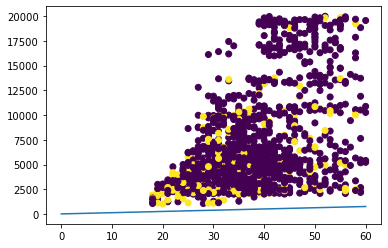

In [283]:
plt.scatter(x_data[:,0],x_data[:,1], c= y_data)

plt.plot(x,y)

In [284]:
def predictor(weights,x):
    if sign(weights,x) == 1:
        return "Left the company"
    else:
        return "Stayed"

In [285]:
df.Attrition[60]

-1

In [286]:
predictor(w, (df.Age[60],df.MonthlyIncome[60]))

'Stayed'

In [287]:
r = random.randint(0,99)

print("True Label: ", df.Attrition[r])
print("Predicted Label: ", predictor(w, (df.Age[r],df.MonthlyIncome[r])))

True Label:  -1
Predicted Label:  Stayed


The Perceptron Learning Algorithm is only accurate when the data is linearly separable. Thus, while it is not a good fit for this [IBMEmployeeAttrition](https://github.com/Madison-Bunting/INDE-577/blob/main/IBMEmployeeAttrition.csv) dataset, the Perceptron's low computational overhead makes it ideal for small, quick and linearly separable data.